# AstroHACK DEMO VLA

# Start Dask Cluster

In [1]:
from astrohack.astrohack_client import astrohack_local_client
log_parms = {'log_to_term':True,'log_level':'DEBUG','log_to_file':True,'log_file':'/users/jsteeb/astrohack/examples/logs/hack_'}
worker_log_parms = {'log_to_term':False,'log_level':'DEBUG','log_to_file':True,'log_file':'/users/jsteeb/astrohack/examples/logs/hack_'}

client = astrohack_local_client(cores=16,memory_limit='10GB',log_parms=log_parms,worker_log_parms=worker_log_parms)
client

2023-04-12 11:32:57,036 - INFO     - astrohack - (astrohack_client.py:74) - Created client <Client: 'tcp://127.0.0.1:43351' processes=16 threads=16, memory=149.01 GiB>


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 16,Total memory: 149.01 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43351,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 149.01 GiB
Comm: tcp://127.0.0.1:43504,Total threads: 1
Dashboard: http://127.0.0.1:40640/status,Memory: 9.31 GiB
Nanny: tcp://127.0.0.1:36875,


# Create holog_obs_description

In [2]:
from astrohack.extract_holog import extract_holog
import numpy as np
import json

reference_antennas = np.array(['ea01','ea02','ea03','ea04','ea05','ea07','ea08','ea09','ea11','ea12','ea14','ea18','ea19','ea21','ea22','ea24','ea27'])
mapping_antennas = np.array(['ea06','ea10','ea13','ea15','ea16','ea17','ea23','ea25','ea26','ea28'])
scans = np.array([8,9,10,12,13,14,16,17,18,23,24,25,27,28,29,31,32,33,38,39,40,42,43,44,46,47,48,53,54,55,57])
holog_obs_description = {'map_0':{'ant':{}}}

for m_ant in mapping_antennas:
    holog_obs_description['map_0']['scans'] = scans
    holog_obs_description['map_0']['ant'][m_ant]=reference_antennas
    
    
holog_obs_description['ddi'] = np.arange(16)
print(json.dumps(holog_obs_description, indent=4, default=str))

{
    "map_0": {
        "ant": {
            "ea06": "['ea01' 'ea02' 'ea03' 'ea04' 'ea05' 'ea07' 'ea08' 'ea09' 'ea11' 'ea12'\n 'ea14' 'ea18' 'ea19' 'ea21' 'ea22' 'ea24' 'ea27']",
            "ea10": "['ea01' 'ea02' 'ea03' 'ea04' 'ea05' 'ea07' 'ea08' 'ea09' 'ea11' 'ea12'\n 'ea14' 'ea18' 'ea19' 'ea21' 'ea22' 'ea24' 'ea27']",
            "ea13": "['ea01' 'ea02' 'ea03' 'ea04' 'ea05' 'ea07' 'ea08' 'ea09' 'ea11' 'ea12'\n 'ea14' 'ea18' 'ea19' 'ea21' 'ea22' 'ea24' 'ea27']",
            "ea15": "['ea01' 'ea02' 'ea03' 'ea04' 'ea05' 'ea07' 'ea08' 'ea09' 'ea11' 'ea12'\n 'ea14' 'ea18' 'ea19' 'ea21' 'ea22' 'ea24' 'ea27']",
            "ea16": "['ea01' 'ea02' 'ea03' 'ea04' 'ea05' 'ea07' 'ea08' 'ea09' 'ea11' 'ea12'\n 'ea14' 'ea18' 'ea19' 'ea21' 'ea22' 'ea24' 'ea27']",
            "ea17": "['ea01' 'ea02' 'ea03' 'ea04' 'ea05' 'ea07' 'ea08' 'ea09' 'ea11' 'ea12'\n 'ea14' 'ea18' 'ea19' 'ea21' 'ea22' 'ea24' 'ea27']",
            "ea23": "['ea01' 'ea02' 'ea03' 'ea04' 'ea05' 'ea07' 'ea08' 'ea09' 'ea11' 'ea12

# Extract Holog

In [3]:
from astrohack.extract_holog import extract_holog
holog_mds = extract_holog(
    ms_name='/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.ms', 
    holog_obs_dict=holog_obs_description,
    data_col='CORRECTED_DATA',
    parallel=True,
    overwrite=True,
)

2023-04-12 11:32:57,141 - INFO     - astrohack - (_check_parms.py:115) - Setting default holog_name to /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.holog.zarr
2023-04-12 11:32:57,142 - INFO     - astrohack - (_check_parms.py:115) - Setting default point_name to /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.point.zarr
2023-04-12 11:32:57,144 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.holog.zarr will be overwritten.
2023-04-12 11:32:57,145 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.point.zarr will be overwritten.
Successful readonly open of usernoread-locked table /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.ms/ANTENNA: 8 columns, 27 rows
Successful rea

In [4]:
# from astrohack._utils._dio import AstrohackHologFile
# holog_mds = AstrohackHologFile('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.holog.zarr')
# holog_mds.open()

In [5]:
holog_mds.summary()

+--------+-------+--------------------------------------------------------------------------------------------------------------------------+
| ddi    | scan  | antenna                                                                                                                  |
+--------+-------+--------------------------------------------------------------------------------------------------------------------------+
| ddi_9  | map_0 | ['ant_ea13', 'ant_ea26', 'ant_ea28', 'ant_ea10', 'ant_ea17', 'ant_ea25', 'ant_ea15', 'ant_ea06', 'ant_ea16', 'ant_ea23'] |
| ddi_3  | map_0 | ['ant_ea06', 'ant_ea15', 'ant_ea16', 'ant_ea23', 'ant_ea13', 'ant_ea26', 'ant_ea10', 'ant_ea28', 'ant_ea25', 'ant_ea17'] |
| ddi_10 | map_0 | ['ant_ea15', 'ant_ea06', 'ant_ea16', 'ant_ea23', 'ant_ea13', 'ant_ea26', 'ant_ea28', 'ant_ea10', 'ant_ea17', 'ant_ea25'] |
| ddi_4  | map_0 | ['ant_ea06', 'ant_ea15', 'ant_ea23', 'ant_ea16', 'ant_ea26', 'ant_ea13', 'ant_ea25', 'ant_ea17', 'ant_ea10', 'ant_ea28'] |
| ddi_

In [6]:
holog_mds['ddi_1']['map_0']['ant_ea25']

<xarray.Dataset>
Dimensions:              (time: 9145, lm: 2, chan: 64, pol: 4)
Coordinates:
  * chan                 (chan) float64 1.41e+10 1.411e+10 ... 1.423e+10
  * pol                  (pol) <U2 'RR' 'RL' 'LR' 'LL'
  * time                 (time) float64 5.17e+09 5.17e+09 ... 5.17e+09 5.17e+09
Dimensions without coordinates: lm
Data variables:
    DIRECTIONAL_COSINES  (time, lm) float64 -0.004335 -0.002795 ... 0.009569
    VIS                  (time, chan, pol) complex64 0j ... (0.00022194455-0....
    WEIGHT               (time, chan, pol) float64 0.0 0.0 ... 1.67e+06
Attributes:
    antenna_name:         ea25
    ddi:                  1
    holog_map_key:        map_0
    l_max:                0.009673800837874147
    l_min:                -0.009671789717177779
    m_max:                0.00969833533008718
    m_min:                -0.00977158042131752
    parallactic_samples:  [5.307972218541546, 5.354953165003046, 5.4937719298...
    telescope_name:       EVLA

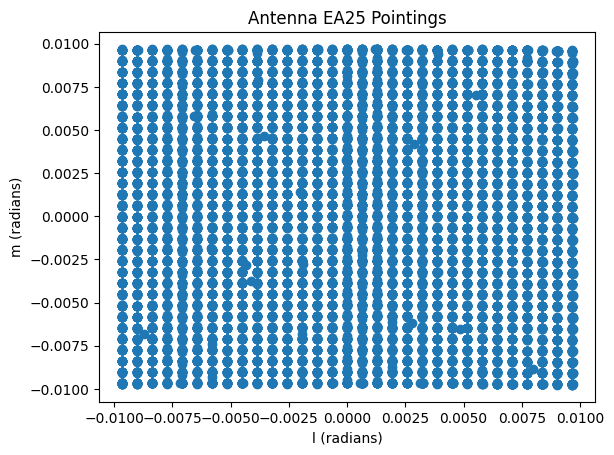

In [7]:
import matplotlib.pyplot as plt
lm_da = holog_mds['ddi_1']['map_0']['ant_ea25'].DIRECTIONAL_COSINES

plt.figure()
plt.scatter(lm_da.isel(lm=0),lm_da.isel(lm=1))
plt.title('Antenna EA25 Pointings')
plt.xlabel('l (radians)')
plt.ylabel('m (radians)')
plt.show()


In [8]:
from astrohack.dio import _load_point_file
point_mds = _load_point_file('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.point.zarr')
point_mds['ant_ea04']

<xarray.Dataset>
Dimensions:              (time: 114465, az_el: 2, ra_dec: 2)
Coordinates:
  * time                 (time) float64 5.17e+09 5.17e+09 ... 5.17e+09 5.17e+09
Dimensions without coordinates: az_el, ra_dec
Data variables:
    DIRECTION            (time, az_el) float64 dask.array<chunksize=(57233, 1), meta=np.ndarray>
    DIRECTIONAL_COSINES  (time, ra_dec) float64 dask.array<chunksize=(57233, 1), meta=np.ndarray>
    ENCODER              (time, az_el) float64 dask.array<chunksize=(57233, 1), meta=np.ndarray>
    POINTING_OFFSET      (time, az_el) float64 dask.array<chunksize=(57233, 1), meta=np.ndarray>
    TARGET               (time, az_el) float64 dask.array<chunksize=(57233, 1), meta=np.ndarray>
Attributes:
    ant_name:       ea04
    mapping_scans:  [{'0': [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1...

Text(0.5, 1.0, 'Antenna EA25')

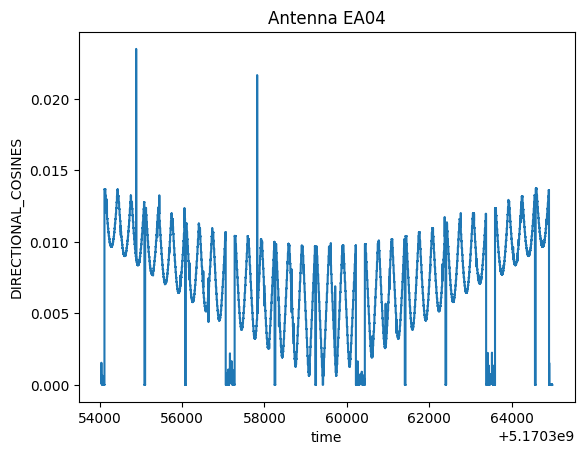

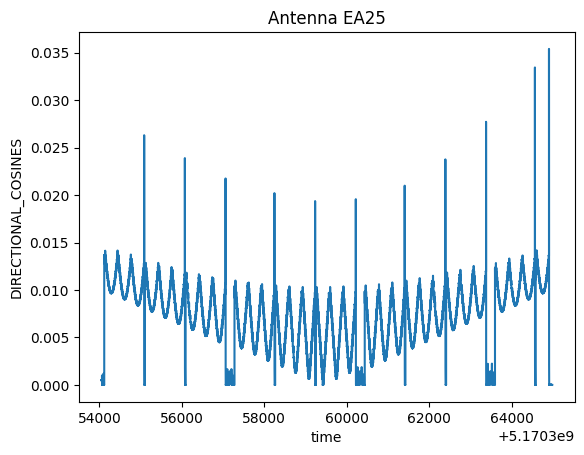

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib widget
ant_name = 'ant_ea04'
lm_da = point_mds[ant_name].DIRECTIONAL_COSINES
r = np.sqrt(lm_da.isel(ra_dec=0,time=slice(5000,-1))**2 + lm_da.isel(ra_dec=1,time=slice(5000,-1))**2)

plt.figure()
r.plot()
plt.title('Antenna EA04')


ant_name = 'ant_ea25'
lm_da = point_mds[ant_name].DIRECTIONAL_COSINES
r = np.sqrt(lm_da.isel(ra_dec=0,time=slice(5000,-1))**2 + lm_da.isel(ra_dec=1,time=slice(5000,-1))**2)

plt.figure()
r.plot()
plt.title('Antenna EA25')



# Holog

In [10]:
from astrohack.holog import holog
import numpy as np
cell_size = np.array([-0.0006442, 0.0006442])
grid_size = np.array([31, 31])
grid_interpolation_mode = 'linear' #'nearest', 'linear', 'cubic'

image_mds = holog(holog_name='/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.holog.zarr', padding_factor=50, 
      grid_size=grid_size, cell_size=cell_size, grid_interpolation_mode=grid_interpolation_mode,
      chan_average = True,
      scan_average = True,
      overwrite=True,
      phase_fit=True,
      apply_mask=True,
      to_stokes=True,
      parallel=True
     )

2023-04-12 11:35:16,014 - INFO     - astrohack - (_check_parms.py:115) - Setting default image_file to /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.image.zarr
2023-04-12 11:35:16,017 - INFO     - astrohack - (_check_parms.py:115) - Setting default reference_scaling_frequency to None
2023-04-12 11:35:16,018 - INFO     - astrohack - (_check_parms.py:115) - Setting default ant_list to all
2023-04-12 11:35:16,019 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.image.zarr will be overwritten.
2023-04-12 11:35:16,025 - INFO     - astrohack - (holog.py:135) - Mapping antennas ['ant_ea13', 'ant_ea26', 'ant_ea28', 'ant_ea10', 'ant_ea17', 'ant_ea25', 'ant_ea15', 'ant_ea06', 'ant_ea16', 'ant_ea23']
2023-04-12 11:35:16,026 - INFO     - astrohack - (holog.py:173) - Processing ant_id: ant_ea13 and ddi_9
2023-04-12 11:35:16,027 - INFO     - astrohack - (holog.py:

In [11]:
# from astrohack._utils._dio import AstrohackImageFile
# image_mds = AstrohackImageFile('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.image.zarr')
# image_mds.open()

In [12]:
image_mds.summary()

+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| antenna  | ddi                                                                                                                                                    |
+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| ant_ea26 | ['ddi_15', 'ddi_2', 'ddi_8', 'ddi_5', 'ddi_12', 'ddi_1', 'ddi_6', 'ddi_11', 'ddi_13', 'ddi_4', 'ddi_9', 'ddi_3', 'ddi_14', 'ddi_10', 'ddi_7', 'ddi_0'] |
| ant_ea13 | ['ddi_1', 'ddi_11', 'ddi_6', 'ddi_15', 'ddi_2', 'ddi_8', 'ddi_5', 'ddi_12', 'ddi_10', 'ddi_7', 'ddi_0', 'ddi_4', 'ddi_13', 'ddi_14', 'ddi_9', 'ddi_3'] |
| ant_ea17 | ['ddi_14', 'ddi_4', 'ddi_9', 'ddi_3', 'ddi_13', 'ddi_7', 'ddi_0', 'ddi_10', 'ddi_2', 'ddi_8', 'ddi_12', 'ddi_15', 'ddi_5', 'ddi_1', 'ddi_11', 'ddi_6'] |
| an

In [13]:
image_mds['ant_ea25']['ddi_1']

<xarray.Dataset>
Dimensions:    (time: 1, chan: 1, pol: 4, u_prime: 442, v_prime: 442, u: 529,
                v: 529, l: 31, m: 31, ddi: 1)
Coordinates:
  * chan       (chan) float64 1.417e+10
  * ddi        (ddi) <U5 'ddi_1'
  * l          (l) float64 0.009663 0.009019 0.008375 ... -0.009019 -0.009663
  * m          (m) float64 -0.009663 -0.009019 -0.008375 ... 0.009019 0.009663
  * pol        (pol) <U1 'I' 'Q' 'U' 'V'
  * u          (u) float64 774.7 771.8 768.8 765.9 ... -768.8 -771.8 -774.7
  * u_prime    (u_prime) float64 648.5 645.6 642.6 ... -639.7 -642.6 -645.6
  * v          (v) float64 -774.7 -771.8 -768.8 -765.9 ... 768.8 771.8 774.7
  * v_prime    (v_prime) float64 -648.5 -645.6 -642.6 ... 639.7 642.6 645.6
Dimensions without coordinates: time
Data variables:
    AMPLITUDE  (time, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 221, 221), meta=np.ndarray>
    ANGLE      (time, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 221, 221), meta=np.ndarray>
    APERTURE   (time, chan, pol, u, v) complex128 dask.array<chunksize=(1, 1, 1, 133, 265), meta=np.ndarray>
    BEAM       (time, chan, pol, l, m) complex128 dask.array<chunksize=(1, 1, 4, 31, 31), meta=np.ndarray>
Attributes:
    ant_id:          ant_ea25
    ant_name:        ea25
    ddi:             ddi_1
    telescope_name:  EVLA
    time_centroid:   5170359444.5

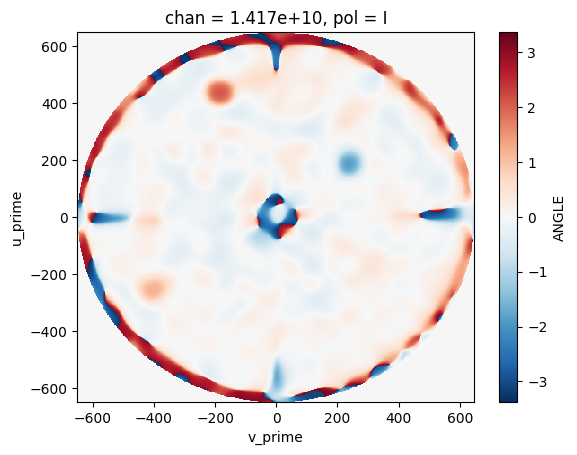

In [14]:
plt.figure()
image_mds['ant_ea25']['ddi_1'].ANGLE.sel(pol='I').plot()

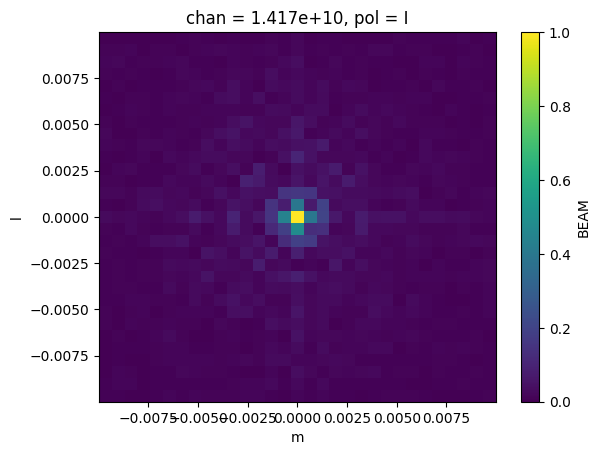

In [15]:
plt.figure()
np.abs(image_mds['ant_ea25']['ddi_1'].BEAM.sel(pol='I')).plot()

In [16]:
#np.abs(holog_mds['ant_ea25']['ddi_1'].APERTURE.sel(pol='U')).plot()

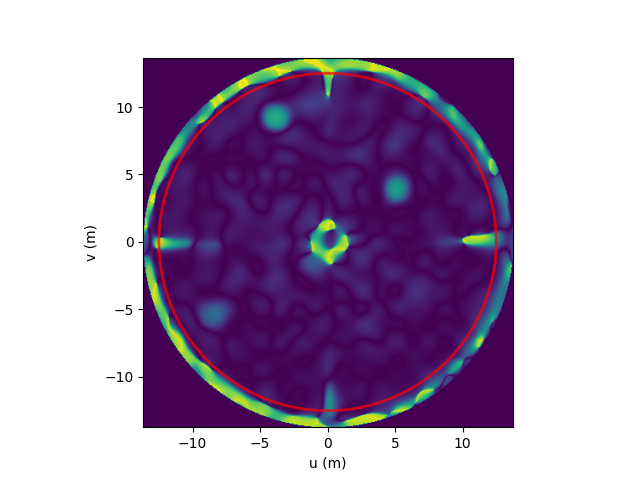

In [17]:
import xarray as xr
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.patches as patches
import scipy.constants

ds = image_mds['ant_ea25']['ddi_1']

wavelength = scipy.constants.speed_of_light/ds.chan.values[0]
u = ds.u_prime.values*wavelength
v = ds.v_prime.values*wavelength

circle = patches.Circle((0,0), 12.5, fill=False, color='red', alpha=0.7, linewidth=2)

fig, ax =plt.subplots()
plt.imshow(np.abs(ds.ANGLE[0,0,0,:,:]),extent=[u.min(), u.max(), v.min(), v.max()])
ax.add_patch(circle)
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.show()

# Panel

In [18]:
from astrohack.panel import panel
ddi = None
panel_model = 'rigid'

panel_mds = panel(
    image_name='/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.image.zarr', 
    panel_model=panel_model,
    unit='mils', 
    parallel=True,
    overwrite=True
)

2023-04-12 11:35:34,444 - INFO     - astrohack - (_check_parms.py:115) - Setting default panel_name to /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.panel.zarr
2023-04-12 11:35:34,446 - INFO     - astrohack - (_check_parms.py:115) - Setting default sel_ddi to all
2023-04-12 11:35:34,447 - WARNING  - astrohack - (_io.py:42) - /.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.panel.zarr will be overwritten.
2023-04-12 11:35:34,448 - INFO     - astrohack - (panel.py:114) - Processing ddi_15 for ant_ea26
2023-04-12 11:35:34,450 - INFO     - astrohack - (panel.py:114) - Processing ddi_2 for ant_ea26
2023-04-12 11:35:34,451 - INFO     - astrohack - (panel.py:114) - Processing ddi_8 for ant_ea26
2023-04-12 11:35:34,452 - INFO     - astrohack - (panel.py:114) - Processing ddi_5 for ant_ea26
2023-04-12 11:35:34,453 - INFO     - astrohack - (panel.py:114) - Processing ddi_12 for ant_ea26
2023-04-12 

In [19]:
# from astrohack._utils._dio import AstrohackPanelFile
# panel_mds = AstrohackPanelFile('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.panel.zarr')
# panel_mds.open()

In [20]:
panel_mds.summary()

+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| antenna  | ddi                                                                                                                                                    |
+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| ant_ea16 | ['ddi_4', 'ddi_12', 'ddi_15', 'ddi_9', 'ddi_3', 'ddi_7', 'ddi_11', 'ddi_0', 'ddi_2', 'ddi_8', 'ddi_14', 'ddi_13', 'ddi_5', 'ddi_1', 'ddi_10', 'ddi_6'] |
| ant_ea23 | ['ddi_0', 'ddi_10', 'ddi_7', 'ddi_9', 'ddi_3', 'ddi_14', 'ddi_13', 'ddi_4', 'ddi_6', 'ddi_11', 'ddi_1', 'ddi_5', 'ddi_12', 'ddi_15', 'ddi_2', 'ddi_8'] |
| ant_ea15 | ['ddi_9', 'ddi_3', 'ddi_15', 'ddi_12', 'ddi_4', 'ddi_0', 'ddi_11', 'ddi_7', 'ddi_13', 'ddi_5', 'ddi_2', 'ddi_8', 'ddi_14', 'ddi_10', 'ddi_6', 'ddi_1'] |
| an

In [21]:
panel_mds['ant_ea25']['ddi_0']

<xarray.Dataset>
Dimensions:             (u: 438, v: 438, labels: 172, pars: 3, screws: 4)
Coordinates:
  * labels              (labels) object '1- 1' '1- 2' '1- 3' ... '6-39' '6-40'
  * pars                (pars) int64 0 1 2
  * screws              (screws) <U2 'il' 'ir' 'ol' 'or'
  * u                   (u) float64 13.72 13.66 13.6 ... -13.54 -13.6 -13.66
  * v                   (v) float64 -13.72 -13.66 -13.6 ... 13.54 13.6 13.66
Data variables:
    AMPLITUDE           (u, v) float64 dask.array<chunksize=(219, 219), meta=np.ndarray>
    CORRECTIONS         (u, v) float64 dask.array<chunksize=(219, 219), meta=np.ndarray>
    DEVIATION           (u, v) float64 dask.array<chunksize=(219, 219), meta=np.ndarray>
    MASK                (u, v) bool dask.array<chunksize=(438, 438), meta=np.ndarray>
    PANEL_DISTRIBUTION  (u, v) int32 dask.array<chunksize=(219, 219), meta=np.ndarray>
    PANEL_PARAMETERS    (labels, pars) float64 dask.array<chunksize=(172, 3), meta=np.ndarray>
    PANEL_SCREWS        (labels, screws) float64 dask.array<chunksize=(172, 4), meta=np.ndarray>
    PHASE               (u, v) float64 dask.array<chunksize=(219, 219), meta=np.ndarray>
    PHASE_CORRECTIONS   (u, v) float64 dask.array<chunksize=(219, 219), meta=np.ndarray>
    PHASE_RESIDUALS     (u, v) float64 dask.array<chunksize=(219, 219), meta=np.ndarray>
    RESIDUALS           (u, v) float64 dask.array<chunksize=(219, 219), meta=np.ndarray>
Attributes: (12/13)
    AIPS:              False
    amp_unit:          V
    antenna_name:      ea25
    cutoff:            0.7481209609253406
    input_gain:        99.40058629858581
    input_rms:         0.0004743264995194888
    ...                ...
    output_rms:        0.00020614589829760581
    panel_kind:        rigid
    panel_margin:      0.2
    telescope_name:    VLA
    theoretical_gain:  99.52367440251265
    wavelength:        0.02135426013248807

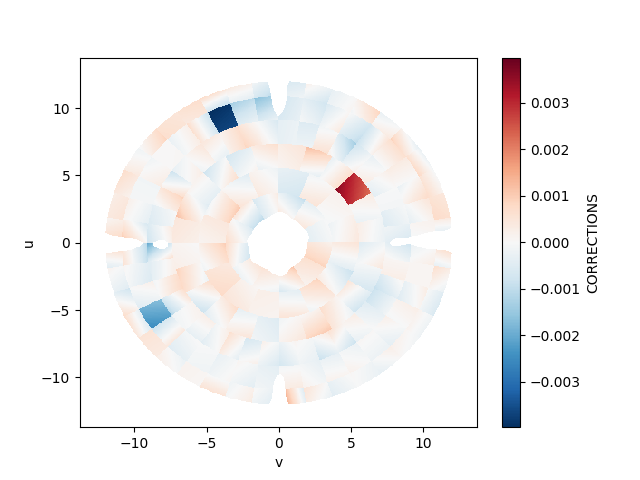

In [22]:
plt.figure()
panel_mds['ant_ea25']['ddi_0']['CORRECTIONS'].plot()

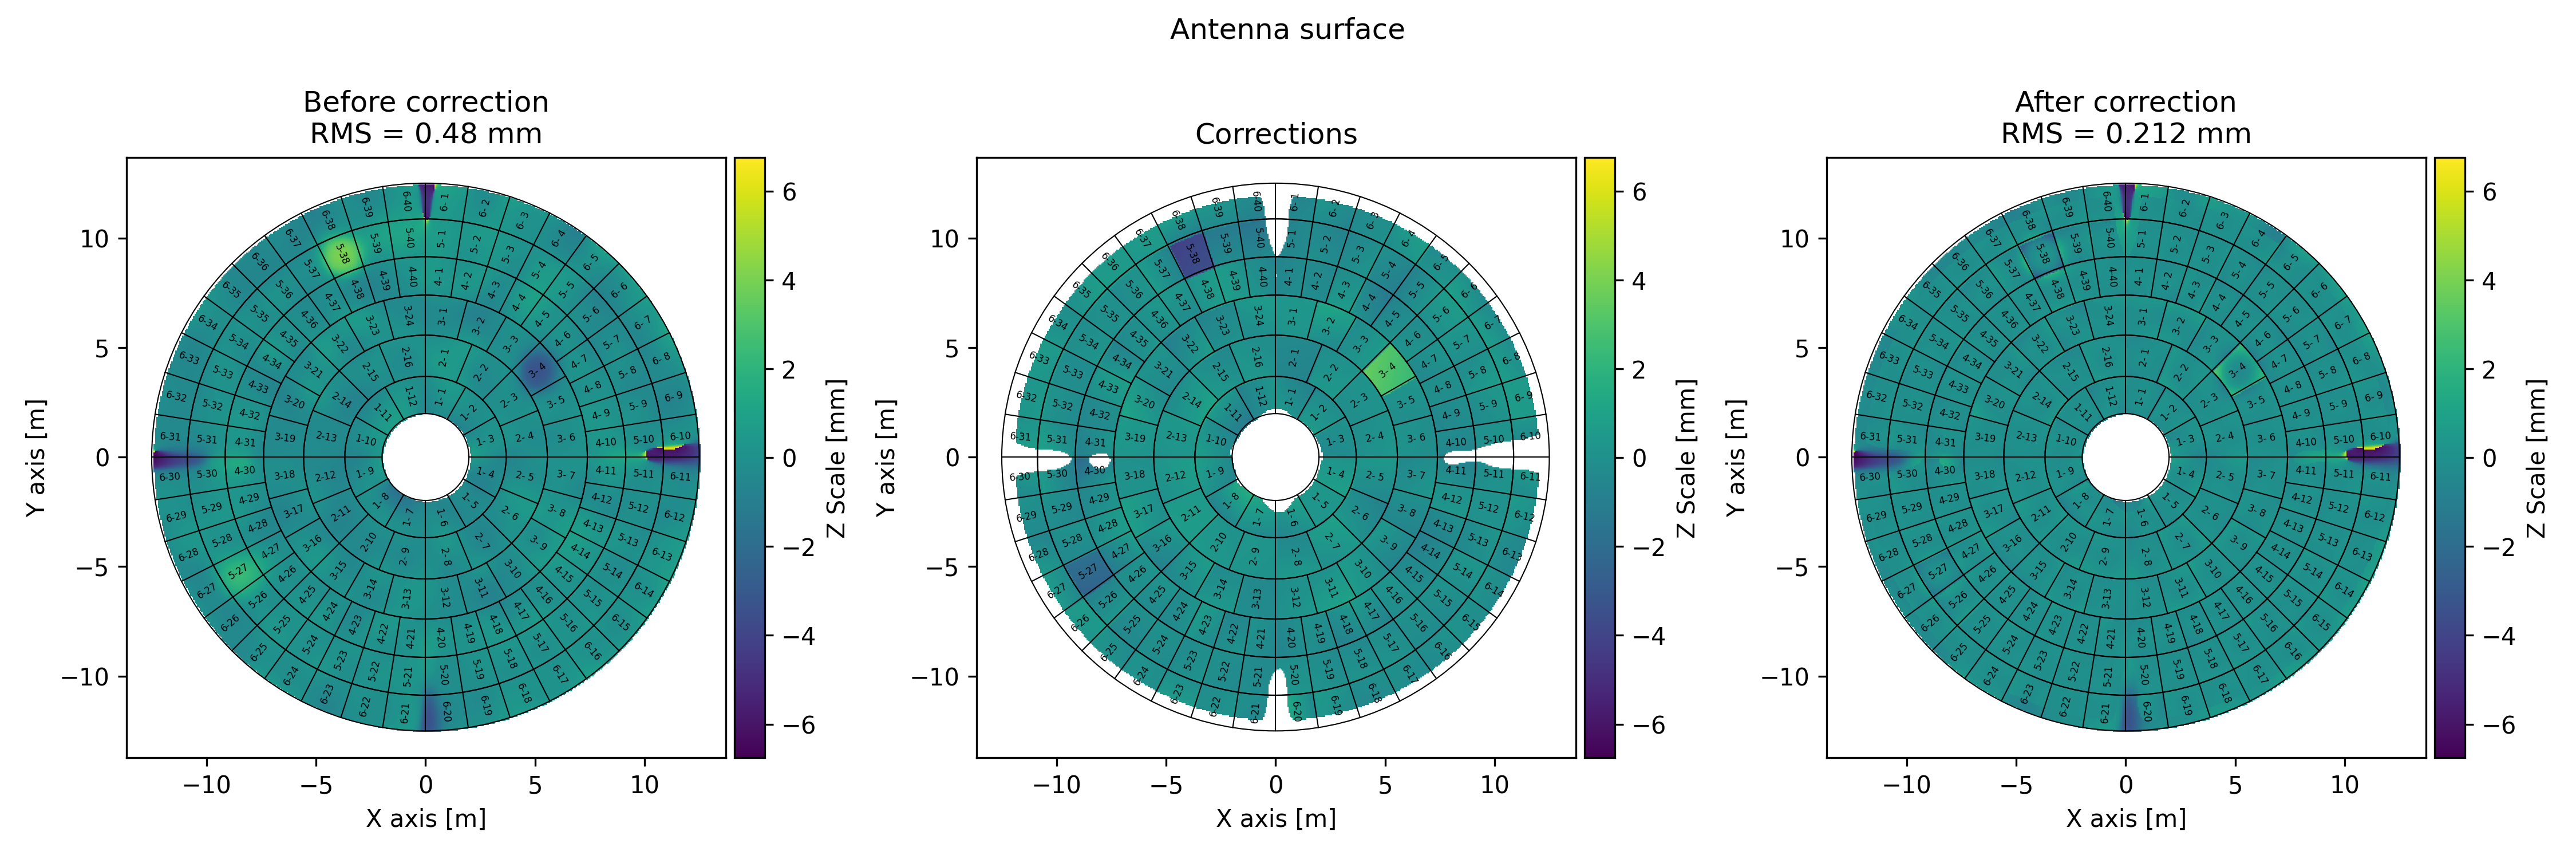

In [23]:
from IPython.display import Image
Image(filename = "/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.panel.zarr/ant_ea25/ddi_1/surface.png", width=1500, height=1500)

In [24]:
f = open('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.panel.zarr/ant_ea25/ddi_1/screws.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Screw adjustments for VLA ea25 antenna
Adjustments are in mils


                         Inner Edge            Outer Edge            
     Ring    panel     left       right      left       right      
1- 1     -17.94      -1.62       3.26      35.11
1- 2     -17.67     -25.62      13.09       0.13
1- 3       8.53      15.92      -4.44       8.44
1- 4      -9.46     -28.66      -4.45     -38.33
1- 5     -16.83     -13.17     -16.03      -9.57
1- 6     -44.93     -22.04     -10.53      28.81
1- 7     -42.23     -46.48      13.12       1.69
1- 8     -76.96     -65.39      14.83      32.66
1- 9      32.02      17.21      -6.07     -34.49
1-10      14.68      31.93     -32.92       0.41
1-11      44.14      55.87     -25.14      -5.55
1-12      20.40      -6.22      33.52     -16.80
2- 1      24.34      28.74      12.57      18.82
2- 2     -12.82     -21.40       4.66      -7.67
2- 3       2.36       4.46      -9.39      -6.51
2- 4       5.51      -1.08      -4.94     -14.71
2- 5     -18.

In [25]:
from casacore import tables as ctables
import os
import numpy as np

ctb = ctables.table(
    os.path.join('/.lustre/cv/projects/casa/holo/demo/ea25/after_THOL0001.sb42608447.eb42709773.59842.053038750004.ms', "ANTENNA"),
    readonly=True,
    lockoptions={"option": "usernoread"},
    ack=False,
)

ant_names = ctb.getcol("NAME")
ant_id = np.arange(len(ant_names))